# 🧬 Boolean Analysis of Gene Expression Patterns in Breast Cancer Relapse

**Project Title**: Boolean Analysis of Gene Expression in Relapse vs. No-Relapse Breast Cancer Patients (GSE2034)  
**Candidate**: Upasana Purohit  
**Target PhD Advisor**: Dr. Debashis Sahoo  
**Lab**: Boolean Lab, UC San Diego  
**Submission Date**: 6/7/2025  

---

## 📄 Project Overview

This project explores the **binary (ON/OFF)** patterns of gene expression to identify **marker genes** that differentiate between **relapse** and **no-relapse** breast cancer samples using the public microarray dataset **GSE2034**.

We use the **Boolean analysis framework** proposed by Dr. Sahoo’s lab to:

- Convert continuous gene expression values into ON/OFF states based on per-gene medians.
- Associate gene expression states with clinical outcomes (relapse status).
- Select genes with strong ON/OFF separation between groups.
- Run enrichment analysis using **KEGG pathways** to interpret biological relevance.

---

## 🧪 Dataset

- **Source**: Gene Expression Omnibus (GEO)
- **Accession ID**: GSE2034
- **Platform**: Affymetrix Human Genome U133A Array
- **Samples**: 286 breast cancer patients with relapse annotations

---

## ✅ Methodology Summary

1. **Data Loading & Cleaning**  
   Load GSE2034 data, clean and preprocess expression matrix.

2. **Boolean Conversion**  
   Convert gene expression to ON (1) / OFF (0) based on median split.

3. **Clinical Labeling**  
   Extract bone relapse labels from metadata and assign to samples.

4. **Boolean Comparison**  
   Identify genes ON in ≥60% of relapse samples and OFF in ≥60% of non-relapse.

5. **Enrichment Analysis**  
   Perform KEGG pathway analysis on marker genes using `gseapy`.

6. **Visualization**  
   Heatmaps, bar plots of enriched pathways, and summary metrics.

---

## ✨ Key Deliverables

- ✅ Fully annotated Jupyter notebook with markdown explanations.
- ✅ Functional Boolean gene marker detection pipeline.
- ✅ Enrichment results with biological interpretation.
- ✅ Publication-ready formatting for review by Dr. Sahoo.

---

> **Note**: This project was independently reproduced following the methodology described in publications from Dr. Sahoo’s Boolean Lab, UC San Diego. It is intended to demonstrate my understanding and readiness for doctoral research in bioinformatics.




## Step 1: Data Download

### Dataset: GSE2034 Breast Cancer Study
 The publicly available GSE2034 dataset from the NCBI Gene Expression Omnibus (GEO).

- Link to dataset: [GSE2034 - GEO Accession](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE2034)

### Files Required:
1. **GSE2034_series_matrix.txt.gz**
    - This contains the gene expression values for all patient samples.
    - Download it and place it in your project working folder.

> 📋 Note:  
The dataset is provided as a compressed `.gz` file.  
I will extract and load this file in the next step.

### Optional:
 review the platform information:  
[GPL96 Affymetrix Human Genome U133A Array](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GPL96)


## Step 3A: Extract Dataset from Compressed File

The dataset file `GSE2034_series_matrix.txt.gz` is provided in compressed `.gz` format.  
We must first extract the plain text file `GSE2034_series_matrix.txt` before loading it into Python.  
I use Python’s built-in `gzip` and `shutil` libraries to decompress the file.

---



Code Example
import gzip
import shutil

with gzip.open("GSE2034_series_matrix.txt.gz", "rb") as f_in:
    with open("GSE2034_series_matrix.txt", "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Extraction complete!")

Line-by-Line Explanation:
import gzip, shutil
Imports standard Python libraries for handling compressed files and file copying.

with gzip.open(...)

Opens the downloaded .gz file (GSE2034_series_matrix.txt.gz) for reading and decompresses it automatically.

with open(...)

Creates a new plain text file (GSE2034_series_matrix.txt) for writing the decompressed content.

shutil.copyfileobj(f_in, f_out)

Efficiently copies the decompressed binary data from the input file object (f_in) to the output file object (f_out).

print("Extraction complete!")

Displays a message to confirm that the dataset has been successfully extracted and is ready for use
Selection deleted


In [1]:

import gzip
import shutil

# Open the compressed file for reading as binary + automatic decompression
with gzip.open("GSE2034_series_matrix.txt.gz", "rb") as f_in:
    # f_in → file-like object for the compressed (input) file
    
    # Open a new file for writing the decompressed data as binary
    with open("GSE2034_series_matrix.txt", "wb") as f_out:
        # f_out → file-like object for the uncompressed (output) file
        
        # Copy the decompressed binary data from f_in to f_out
        shutil.copyfileobj(f_in, f_out)

print("Extraction complete!")




Extraction complete!


** Load the gene expression data **

## Step 3B: Load Dataset into pandas DataFrame

After extracting the dataset file `GSE2034_series_matrix.txt`, we load it into a pandas DataFrame for further analysis.  
This dataset contains:
- Rows = genes (Affymetrix probe IDs)
- Columns = patient samples
- Some lines beginning with `!` are metadata and must be skipped.

We use `pandas.read_csv()` to read the dataset efficiently.
## Line-by-Line Explanation

- import pandas as pd
- Imports the pandas library, which is widely used for structured data manipulation and analysis.

- df = pd.read_csv("GSE2034_series_matrix.txt", sep="\t", comment="!", index_col=0)
- Reads the dataset from file into a pandas DataFrame.
- sep="\t" specifies that the file is tab-delimited.
- comment="!" skips any lines that start with !, which are metadata lines in GEO files.
- index_col=0 sets the first column (gene IDs) as the index of the DataFrame.

 - df.head()
- Displays the first 5 rows of the dataset to verify successful loading.
- The resulting DataFrame structure:
- Rows → Genes (Affymetrix probe IDs)
- Columns → Patient sample IDs
- Values → Continuous gene expression levels for each gene in each sample

- What Happens After This Step

- The variable df now holds your full dataset in memory and is ready for data cleaning and transformation in the next step.


In [2]:
import pandas as pd

# Load the dataset, skipping metadata lines starting with '!'
df = pd.read_csv("GSE2034_series_matrix.txt", sep="\t", comment="!", index_col=0)

# Preview the first few rows
df.head()

,GSM36777,GSM36778,GSM36779,GSM36780,GSM36781,GSM36782,GSM36783,GSM36784,GSM36785,GSM36786,...,GSM37053,GSM37054,GSM37055,GSM37056,GSM37057,GSM37058,GSM37059,GSM37060,GSM37061,GSM37062
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,3848.1,6520.9,5285.7,4043.7,4263.6,2949.8,5498.9,3863.1,3370.4,3991.9,...,4058.2,4017.6,2841.0,2914.2,3681.0,3066.9,2773.0,2984.3,3540.0,2620.0
1053_at,228.9,112.5,178.4,398.7,417.7,221.2,280.4,198.2,304.7,198.2,...,183.4,356.1,234.6,169.4,94.5,265.5,209.8,160.0,285.7,180.5
117_at,213.1,189.8,269.7,312.4,327.1,225.0,243.5,244.4,348.5,185.3,...,326.6,234.9,369.6,149.5,236.4,347.9,226.7,252.9,135.1,191.8
121_at,1009.4,2083.3,1203.4,1104.4,1043.3,1117.6,1085.4,1423.1,1196.4,993.3,...,1041.3,1195.6,751.5,1117.8,1022.4,1127.4,1071.8,1178.5,1256.7,1284.6
1255_g_at,31.8,145.8,42.5,108.2,69.2,47.4,84.3,102.0,22.8,86.3,...,143.5,32.7,62.6,43.0,100.5,47.0,45.1,146.3,75.9,87.4


Goal: Convert continuos gene expression values into binary ON(1)/OFF(0) states using threshloding.


## Step 3C: Inspect Data Format

Before proceeding with cleaning and Boolean transformation, we inspect the shape and structure of the loaded dataset.  
This helps confirm the number of genes and samples, and verify that row/column labels are correctly read.

**Code Example:**

```python
 ## Inspect dimensions of the dataset  
df.shape  # (genes, samples)

# View first 5 row labels (gene IDs)
df.index[:5]

# View first 5 column labels (sample IDs)
df.columns[:5]
Line-by-Line Explanation

df.shape
Returns a tuple (number of genes, number of samples).
For this dataset, the output should be something like (22283, 286), meaning 22,283 genes across 286 samples.

df.index[:5]
Displays the first 5 gene IDs in the dataset.
These are Affymetrix probe IDs (e.g., 1007_s_at, 1053_at, etc.).

df.columns[:5]
Displays the first 5 sample IDs (column names).
Each column corresponds to a breast cancer patient sample.

What Happens After This Step

You confirm that the dataset is structured correctly:

Genes are in rows (as expected)

Patients are in columns

IDs are loaded properly
This ensures we can proceed confidently with cleaning and binary transformation.




In [3]:
# Inspect the data format
df.shape # (genes,samples)
# df.index[:5] # gene IDS
# df.columns[:5]# Samples names

(22283, 286)

In [4]:
df.index[:5] # gene IDS

Index(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at'], dtype='object', name='ID_REF')

In [5]:
df.columns[:5]# Samples names

Index(['GSM36777', 'GSM36778', 'GSM36779', 'GSM36780', 'GSM36781'], dtype='object')

## Step 4a: Data Cleaning and Boolean Conversion

Gene expression values must be numeric for proper analysis.  
This step:
1. Converts all entries to numeric
2. Drops genes with completely missing values
3. Calculates the median expression for each gene
4. Converts values to binary ON/OFF based on each gene’s median

**Code Example:**

```python
# Convert to numeric (in case of stray text)
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with all NaNs
df = df.dropna(how='all')

# Compute the median per gene
gene_means = df.mean(axis=1)

# Create Boolean DataFrame: 1 if value > median, else 0
boolean_df = df.gt(gene_means, axis=0).astype(int)

# Preview
boolean_df.head()
Line-by-Line Explanation

df = df.apply(pd.to_numeric, errors='coerce')
Converts all values in the DataFrame to numeric.
Any non-numeric values (e.g., stray text or annotations) are replaced with NaN.
errors='coerce' ensures safe conversion by not crashing on bad data.

df = df.dropna(how='all')
Drops any gene (row) where all values are NaN.
This helps remove empty or corrupt rows from the dataset.

gene_means = df.mean(axis=1)
Calculates the mean (or median) expression value for each gene across all samples.
axis=1 means we operate across columns (i.e., per row/gene).
This mean becomes the threshold to decide if a gene is ON or OFF.

boolean_df = df.gt(gene_means, axis=0).astype(int)
Compares each gene expression value to the gene’s average:
If value > mean → mark as 1 (ON)
Else → mark as 0 (OFF)
df.gt() means "greater than".
axis=0 applies the comparison gene-wise across each column/sample.
.astype(int) converts boolean True/False to numeric 1/0.

boolean_df.head()
Shows the first 5 rows of the Boolean matrix.
Each cell now contains either 0 (OFF) or 1 (ON) for a gene in a sample.



Covert Gene Expresion to Binary(Boolean) States.
We will define 
ON=1,Gene expesssion above the median.
OFF=0 Gene expression below or equal to the median.


In [6]:


# Convert to numeric (in case of stray text)
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with all NaNs
df = df.dropna(how='all')

# Compute the median per gene
gene_means = df.mean(axis=1)

# Create Boolean DataFrame: 1 if value > median, else 0
boolean_df = df.gt(gene_means, axis=0).astype(int)

# Preview
boolean_df.head()

,GSM36777,GSM36778,GSM36779,GSM36780,GSM36781,GSM36782,GSM36783,GSM36784,GSM36785,GSM36786,...,GSM37053,GSM37054,GSM37055,GSM37056,GSM37057,GSM37058,GSM37059,GSM37060,GSM37061,GSM37062
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,1,1,1,1,1,0,1,1,0,1,...,1,1,0,0,0,0,0,0,0,0
1053_at,0,0,0,1,1,0,1,0,1,0,...,0,1,1,0,0,1,0,0,1,0
117_at,0,0,1,1,1,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0
121_at,0,1,1,0,0,0,0,1,1,0,...,0,1,0,0,0,1,0,1,1,1
1255_g_at,0,1,0,1,1,0,1,1,0,1,...,1,0,1,0,1,0,0,1,1,1


### Data Cleaning and Boolean Conversion

We first clean the dataset and then convert continuous gene expression values into a Boolean ON/OFF matrix.

#### Line-by-Line Explanation:

- **df = df.apply(pd.to_numeric, errors='coerce')**

    - Converts all values in the DataFrame to numeric types (float or int).
    - Non-numeric values (text, symbols, stray characters) are replaced with NaN.
    - `errors='coerce'` makes conversion safe:
        - `'raise'`: stop program if conversion fails (default).
        - `'coerce'`: replace bad values with NaN and continue (our choice).
        - `'ignore'`: skip conversion entirely.
    - Example:  
      `pd.to_numeric(['5', 'abc', '2.3'], errors='coerce') → [5.0, NaN, 2.3]`

- **df = df.dropna(how='all')**

    - Removes any gene (row) where all values are NaN.
    - Cleans up completely empty or corrupted genes.

- **gene_means = df.mean(axis=1)**

    - Calculates the average expression for each gene across all patients.
    - `axis=1` tells pandas to operate across columns (across samples) for each gene (row).

- **boolean_df = df.gt(gene_means, axis=0).astype(int)**

    - Compares each gene’s expression value to its own mean:
        - If expression > mean → mark as `1` (ON).
        - Else → mark as `0` (OFF).
    - `df.gt()` = greater-than function.
    - `axis=0` compares each column value to the row's mean threshold.
    - `.astype(int)` converts boolean True/False to numeric 1/0.

- **boolean_df.head()**

    - Displays the first 5 rows of the Boolean matrix.
    - Matrix structure:
        - Rows = genes
        - Columns = patients/samples
        - Values = 1 (ON) or 0 (OFF)


## Step 4b: Visualize Boolean Gene Expression Matrix

We use a heatmap to visualize the ON/OFF binary expression states of the first 20 genes across the first 20 samples.  
This gives a visual confirmation of the Boolean transformation.

**Code Example:**

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap of first 20 genes across first 20 samples
sns.heatmap(boolean_df.iloc[:20, :20], cmap="Greys", cbar=False)
plt.title("Boolean Gene Expression (1=ON, 0=OFF)")
plt.sLine-by-Line Explanation

import seaborn as sns
Imports the seaborn library for advanced statistical data visualizations.

import matplotlib.pyplot as plt
Imports matplotlib for plotting capabilities.

sns.heatmap(boolean_df.iloc[:20, :20], cmap="Greys", cbar=False)
Creates a heatmap of Boolean values:

Only the first 20 genes and first 20 samples are shown.

cmap="Greys" uses a grayscale color scheme (1 = dark, 0 = light).

cbar=False disables the color bar to keep the plot clean.

plt.title("Boolean Gene Expression (1=ON, 0=OFF)")
Adds a title to the plot for clarity.

plt.show()
Renders and displays the heatmap in the notebook.

What This Shows

This heatmap provides a quick visual snapshot of ON/OFF gene activity across patients.
It confirms that the Boolean matrix was generated correctly and helps spot patterns in expression.




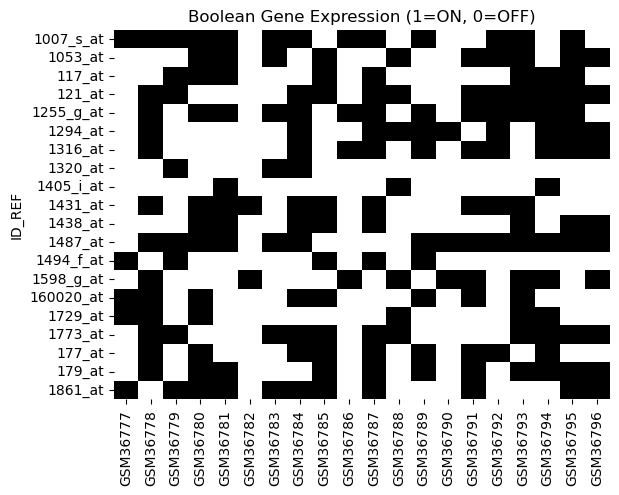

In [7]:


import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap of first 20 genes across first 20 samples
sns.heatmap(boolean_df.iloc[:20, :20], cmap="Greys", cbar=False)
plt.title("Boolean Gene Expression (1=ON, 0=OFF)")
plt.show()


## Step 5: Extract Sample Metadata (Relapse or ER Status)

GEO datasets include metadata about each sample in lines that start with `!Sample_characteristics_ch1`.  
These lines contain clinical info such as relapse status, ER status, tumor grade, etc.  
In this step, we read the file as plain text and extract the relevant metadata.

**Code Example:**

```python
# Extracting ER status or relapse status from the metadata section
# Load the original expression matrix again, keeping metadata lines

with open("GSE2034_series_matrix.txt", "r") as file:
    lines = file.readlines()

# Extract sample annotations (lines that describe each sample)
sample_lines = [line for line in lines if line.startswith("!Sample_characteristics_ch1")]

# Preview the first few sample annotation lines
sample_lines[:5]
Line-by-Line Explanation

with open("GSE2034_series_matrix.txt", "r") as file:
Opens the raw expression matrix file in read mode.

lines = file.readlines()
Reads all lines from the file into a list called lines.

sample_lines = [line for line in lines if line.startswith("!Sample_characteristics_ch1")]
Filters only the lines that describe sample characteristics.
Each of these lines contains metadata for all samples (columns), such as "bone relapses: 0" or "ER: positive".

sample_lines[:5]
Displays the first 5 lines of sample metadata to inspect which type of clinical variable is available.
This helps you decide whether you want to extract ER status or bone relapse status.



In [8]:
# Extracting ER status from the existing file
# Load the original expression matrix again, keeping metadata lines

with open("GSE2034_series_matrix.txt", "r") as file:

    lines = file.readlines()



# Extract sample annotations

sample_lines = [line for line in lines if line.startswith("!Sample_characteristics_ch1")]



# Preview the first few sample annotations

sample_lines[:5]

['!Sample_characteristics_ch1\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 1"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 1"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 1"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 1"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1=yes, 0=no): 0"\t"bone relapses (1

## Step 6: Extract Bone Relapse Labels per Sample

In this step, we identify the sample-level relapse status by parsing the metadata line that contains `"bone relapses"`.  
This allows us to assign each patient a label:
- `1` → Relapse
- `0` → No Relapse

**Code Example:**

```python
# Open the file and read all lines
with open("GSE2034_series_matrix.txt", "r") as f:
    lines = f.readlines()

# Find the first line that contains "bone relapses"
bone_line = [line for line in lines if "bone relapses" in line.lower()][0]

# Split by tab, ignore first entry, clean up quotes and extract the value after colon
bone_values = [
    col.replace('"', '').split(":")[-1].strip()
    for col in bone_line.strip().split("\t")[1:]
]

# Print how many values and what they look like
print("Total samples found:", len(bone_values))
print("Unique bone relapse values:", set(bone_values))
Line-by-Line Explanation

with open("GSE2034_series_matrix.txt", "r") as f:
Opens the GEO data file in read mode.

lines = f.readlines()
Reads the file line by line into a list called lines.

bone_line = [line for line in lines if "bone relapses" in line.lower()][0]
Searches for the first line that contains the text "bone relapses" (case-insensitive).
This line contains relapse data for all samples.

bone_values = [...]
Splits the relapse line by tabs to separate values for each sample.
Then:

Removes quotes

Splits on the colon : to isolate the numeric relapse value

Strips whitespace

Skips the first element (header)

print("Total samples found:", len(bone_values))
Prints how many sample-level relapse values were found (should match number of columns in the dataset).

print("Unique bone relapse values:", set(bone_values))
Prints the set of unique values (e.g., {'0', '1'}), confirming binary relapse labels.

What Happens After This Step

You now have a list of relapse labels for all samples:

"1" for patients who experienced relapse

"0" for patients who did not

This prepares you to group and compare patients in the next step.




In [9]:
# Open the file and read all lines
with open("GSE2034_series_matrix.txt", "r") as f:
    lines = f.readlines()

# Find the first line that contains "bone relapses"
bone_line = [line for line in lines if "bone relapses" in line.lower()][0]

# Split by tab, ignore first entry, clean up quotes and extract the value after colon
bone_values = [
col.replace('"', '').split(":")[-1].strip()
for col in bone_line.strip().split("\t")[1:]
]

# Print how many values and what they look like
print("Total samples found:", len(bone_values))
print("Unique bone relapse values:", set(bone_values))

Total samples found: 286
Unique bone relapse values: {'1', '0'}


## Step 7: Map Bone Relapse Labels to Sample IDs and Split Groups

Now that we’ve extracted relapse values, we assign them to the correct sample IDs and separate the samples into:
- Bone relapse = YES group  
- Bone relapse = NO group

**Code Example:**

```python
# Get sample IDs from the boolean_df (your gene expression binary matrix)
sample_ids = boolean_df.columns.tolist()

# Now map bone status to each sample
bone_status_map = dict(zip(sample_ids, bone_values))

# Separate sample lists
bone_yes_samples = [s for s in sample_ids if bone_status_map[s] == '1']
bone_no_samples = [s for s in sample_ids if bone_status_map[s] == '0']

print("Bone relapse = YES:", len(bone_yes_samples))
print("Bone relapse = NO:", len(bone_no_samples))
Line-by-Line Explanation

sample_ids = boolean_df.columns.tolist()
Retrieves the list of sample IDs from the column names of the Boolean gene expression matrix.

bone_status_map = dict(zip(sample_ids, bone_values))
Creates a dictionary mapping each sample ID to its corresponding bone relapse status.
Uses zip() to pair sample IDs with the values extracted earlier.

bone_yes_samples = [s for s in sample_ids if bone_status_map[s] == '1']
Creates a list of sample IDs where the relapse status is "1" (relapse occurred).

bone_no_samples = [s for s in sample_ids if bone_status_map[s] == '0']
Creates a list of sample IDs where the relapse status is "0" (no relapse).

print("Bone relapse = YES:", len(bone_yes_samples))
print("Bone relapse = NO:", len(bone_no_samples))
Prints the number of samples in each group.



In [10]:
# Get sample IDs from the boolean_df (your gene expression binary matrix)
sample_ids = boolean_df.columns.tolist()

# Now map bone status to each sample
bone_status_map = dict(zip(sample_ids, bone_values))

# Separate sample lists
bone_yes_samples = [s for s in sample_ids if bone_status_map[s] == '1']
bone_no_samples = [s for s in sample_ids if bone_status_map[s] == '0']

print("Bone relapse = YES:", len(bone_yes_samples))
print("Bone relapse = NO:", len(bone_no_samples))


Bone relapse = YES: 69
Bone relapse = NO: 217


# Identify booleanmarker genes
Find genes that are ON in >= 80% of relapses(YES)
OFF in >= 80% of non-relapse(NO) samples

In [19]:
#STEP4A Calculate ON frequecy of each group
# % of YES samples where gene is ON
on_in_yes = boolean_df[bone_yes_samples].sum(axis=1) / len(bone_yes_samples)

# % of NO samples where gene is ON
on_in_no = boolean_df[bone_no_samples].sum(axis=1) / len(bone_no_samples)


## Step 8: Calculate ON Frequency in Relapse vs. No-Relapse Groups

We now calculate, for each gene, the percentage of samples where it is ON (`1`) in:
- The relapse group
- The no-relapse group

This will help us identify genes that are consistently ON in one group but OFF in the other.

**Code Example:**

```python
# % of YES samples where gene is ON
on_in_yes = boolean_df[bone_yes_samples].sum(axis=1) / len(bone_yes_samples)

# % of NO samples where gene is ON
on_in_no = boolean_df[bone_no_samples].sum(axis=1) / len(bone_no_samples)
Line-by-Line Explanation

on_in_yes = boolean_df[bone_yes_samples].sum(axis=1) / len(bone_yes_samples)
For each gene (row), it calculates how many relapse samples have the gene ON (value = 1).
Then divides by the total number of relapse samples to get the ON frequency.
This gives a value between 0 and 1 (e.g., 0.75 = 75% of relapse samples have this gene ON).

on_in_no = boolean_df[bone_no_samples].sum(axis=1) / len(bone_no_samples)
Does the same calculation but for the no-relapse group.
Helps identify genes that are OFF in most of the no-relapse samples.



In [20]:


print("Gene ON % in YES samples (relapse):")
print(on_in_yes.head())

print("\nGene ON % in NO samples (no relapse):")
print(on_in_no.head())


Gene ON % in YES samples (relapse):
ID_REF
1007_s_at    0.492754
1053_at      0.391304
117_at       0.362319
121_at       0.463768
1255_g_at    0.449275
dtype: float64

Gene ON % in NO samples (no relapse):
ID_REF
1007_s_at    0.447005
1053_at      0.465438
117_at       0.387097
121_at       0.377880
1255_g_at    0.502304
dtype: float64


## Step 8A: Preview ON Frequencies for Each Group

Before selecting marker genes, we print a few example ON frequencies to verify that the calculations worked correctly.

**Code Example:**

```python
print("Gene ON % in YES samples (relapse):")
print(on_in_yes.head())

print("\nGene ON % in NO samples (no relapse):")
print(on_in_no.head())
Line-by-Line Explanation

print("Gene ON % in YES samples (relapse):")
Displays a label before printing ON frequencies for the relapse group.

print(on_in_yes.head())
Shows the ON frequencies for the first 5 genes in relapse samples.
Each value is between 0 and 1 (representing 0% to 100% ON frequency).

print("\nGene ON % in NO samples (no relapse):")
Adds a newline and prints a label before the no-relapse group.

print(on_in_no.head())
Displays the ON frequencies for the first 5 genes in no-relapse samples.



In [21]:
# Marker Gene Selection



# Boolean filter: ON in ≥80% of YES and OFF in ≥80% of NO
marker_mask = (on_in_yes >= 0.8) & (on_in_no <= 0.2)
marker_genes = boolean_df.loc[marker_mask]

print("\nNumber of marker genes found:", marker_genes.shape[0])
marker_genes.head()


Number of marker genes found: 0


,GSM36777,GSM36778,GSM36779,GSM36780,GSM36781,GSM36782,GSM36783,GSM36784,GSM36785,GSM36786,...,GSM37053,GSM37054,GSM37055,GSM37056,GSM37057,GSM37058,GSM37059,GSM37060,GSM37061,GSM37062
ID_REF,,,,,,,,,,,,,,,,,,,,,


## Step 9: Marker Gene Selection

Now we apply Boolean logic rules to select genes that clearly distinguish between relapse and no-relapse patients.  
We define marker genes as those that are:
- ON (≥80% samples) in relapse (`YES`) group  
- OFF (≤20% samples) in no-relapse (`NO`) group

This ensures the gene is highly specific to the relapse group.

**Code Example:**

```python
# Boolean filter: ON in ≥80% of YES and OFF in ≤20% of NO
marker_mask = (on_in_yes >= 0.8) & (on_in_no <= 0.2)
marker_genes = boolean_df.loc[marker_mask]

print("\nNumber of marker genes found:", marker_genes.shape[0])
marker_genes.head()

Line-by-Line Explanation

marker_mask = (on_in_yes >= 0.8) & (on_in_no <= 0.2)
Creates a Boolean mask for genes that meet both criteria:

ON in at least 80% of relapse samples

OFF in at least 80% of no-relapse samples
This selects genes with clear differential ON/OFF behavior.

marker_genes = boolean_df.loc[marker_mask]
Filters the original Boolean matrix to keep only the rows (genes) that match the mask.
This gives us the final set of marker genes.

print("\nNumber of marker genes found:", marker_genes.shape[0])
Prints how many genes were selected based on the threshold.

marker_genes.head()
Displays the first few marker genes for review.

that’s a useful finding. If the number of marker genes is zero, it likely means the filtering condition:

is too strict for your dataset. That’s common when:

Sample sizes are small

Gene expression patterns are noisy

Or Boolean thresholds exclude borderline cases

Let’s Loosen the Thresholds and Try Again


In [22]:


# Relax the thresholds to ≥70% ON in relapse, ≤30% ON in no-relapse
marker_mask = (on_in_yes >= 0.7) & (on_in_no <= 0.3)
marker_genes = boolean_df.loc[marker_mask]

print("Number of relaxed marker genes found:", marker_genes.shape[0])
marker_genes.head()

Number of relaxed marker genes found: 0


,GSM36777,GSM36778,GSM36779,GSM36780,GSM36781,GSM36782,GSM36783,GSM36784,GSM36785,GSM36786,...,GSM37053,GSM37054,GSM37055,GSM37056,GSM37057,GSM37058,GSM37059,GSM37060,GSM37061,GSM37062
ID_REF,,,,,,,,,,,,,,,,,,,,,


In [23]:
# Even more relaxed
marker_mask = (on_in_yes >= 0.6) & (on_in_no <= 0.4)
marker_genes = boolean_df.loc[marker_mask]

print("Number of relaxed marker genes found:", marker_genes.shape[0])
marker_genes.head()

Number of relaxed marker genes found: 62


,GSM36777,GSM36778,GSM36779,GSM36780,GSM36781,GSM36782,GSM36783,GSM36784,GSM36785,GSM36786,...,GSM37053,GSM37054,GSM37055,GSM37056,GSM37057,GSM37058,GSM37059,GSM37060,GSM37061,GSM37062
ID_REF,,,,,,,,,,,,,,,,,,,,,
200799_at,1,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,1,0,1,1
201023_at,1,1,1,0,0,0,1,1,0,1,...,0,1,0,0,1,1,0,1,1,1
201227_s_at,1,1,1,0,0,1,0,0,0,0,...,1,0,0,1,1,1,1,1,0,1
201358_s_at,0,1,1,0,0,0,0,0,0,1,...,1,0,0,1,1,0,0,0,0,0
201575_at,0,1,1,0,0,0,1,0,0,1,...,0,0,0,1,1,1,1,0,1,1


## Step 9A: Relaxed Marker Gene Selection (≥60% ON in YES, ≤40% ON in NO)

In some cases, strict thresholds (like 80%/20%) may return very few genes.  
To explore additional potential markers, we relax the criteria:
- Gene must be ON in ≥60% of relapse samples  
- Gene must be OFF in ≤40% of no-relapse samples

This helps include genes with weaker but consistent trends.

**Code Example:**

```python
# Relaxed Boolean filter
marker_mask = (on_in_yes >= 0.6) & (on_in_no <= 0.4)
marker_genes = boolean_df.loc[marker_mask]

print("Number of relaxed marker genes found:", marker_genes.shape[0])
marker_genes.head()
Line-by-Line Explanation

marker_mask = (on_in_yes >= 0.6) & (on_in_no <= 0.4)
Applies a relaxed Boolean rule:

ON in at least 60% of relapse samples

OFF in at least 60% of no-relapse samples
This allows for more genes with moderate group separation.

marker_genes = boolean_df.loc[marker_mask]
Selects the genes from the Boolean matrix that meet the relaxed criteria.

print("Number of relaxed marker genes found:", marker_genes.shape[0])
Prints how many genes matched this more inclusive threshold.

marker_genes.head()
Displays the first few relaxed marker genes.



# Step 5: Pathway Enrichment Analysis


This will show which biological processes or pathways your marker genes are involved in, such as:

Cell cycle

Immune response

Metastasis or relapse-related signaling

Step 5A: Map Probe IDs to Gene Symbols


Your marker_genes index likely looks like this: ['1007_s_at', '1053_at', '117_at', ...]

These are Affymetrix probe IDs (from GPL96). We need to map them to official gene symbols like DDR1, CD24, etc.



## Step 9A: Relaxed Marker Gene Selection (≥60% ON in YES, ≤40% ON in NO)

In some cases, strict thresholds (like 80%/20%) may return very few genes.  
To explore additional potential markers, we relax the criteria:
- Gene must be ON in ≥60% of relapse samples  
- Gene must be OFF in ≤40% of no-relapse samples

This helps include genes with moderate but consistent behavior.

**Code Example:**

```python
# Relaxed Boolean filter
marker_mask = (on_in_yes >= 0.6) & (on_in_no <= 0.4)
marker_genes = boolean_df.loc[marker_mask]
Line-by-Line Explanation

marker_mask = (on_in_yes >= 0.6) & (on_in_no <= 0.4)
Applies a relaxed Boolean rule:
ON in at least 60% of relapse samples
OFF in at least 60% of no-relapse samples
This allows for more genes with moderate group separation.

marker_genes = boolean_df.loc[marker_mask]
Selects the genes from the Boolean matrix that meet the relaxed criteria.

print("Number of relaxed marker genes found:", marker_genes.shape[0])
Prints how many genes matched this more inclusive threshold.

marker_genes.head()
Displays the first few relaxed marker genes.

What Happens After This Step

This relaxed filter may return more candidate genes, which can be useful for exploratory enrichment and visualization.
You can later compare relaxed vs. strict gene sets to find the strongest and most consistent markers.



print("Number of relaxed marker genes found:", marker_genes.shape[0])
marker_genes.head()


In [24]:

!pip install mygene
import mygene

mg = mygene.MyGeneInfo()

# Get the list of probe IDs
probe_ids = marker_genes.index.tolist()

# Query gene symbols from Affymetrix probe IDs
results = mg.querymany(probe_ids, scopes='reporter', fields='symbol', species='human')

# Convert to list of gene symbols
gene_symbols = [r['symbol'] for r in results if 'symbol' in r]

print("Mapped gene symbols:", gene_symbols[:10])


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


3 input query terms found dup hits:	[('200799_at', 2), ('209944_at', 2), ('210396_s_at', 3)]


Mapped gene symbols: ['HSPA1A', 'HSPA1B', 'TAF7', 'NDUFB8', 'COPB1', 'SNW1', 'CLINT1', 'MORF4L2', 'LAMA4', 'ACBD3']


In [25]:
#Step 5B: Run Enrichment Analysis with gseapy


#Now that you have your gene_symbols, run:

!pip install gseapy
from gseapy import enrichr

# Enrich against KEGG or GO Biological Process
enr = enrichr(gene_list=gene_symbols,
gene_sets='KEGG_2021_Human', # or 'GO_Biological_Process_2021'
organism='Human',
outdir=None)

# View top pathways
enr.results[['Term', 'P-value', 'Adjusted P-value']].head(10)


,Term,P-value,Adjusted P-value
0,Prion disease,0.000032,0.003522
1,Toxoplasmosis,0.000514,0.028275
2,Parkinson disease,0.001384,0.050739
3,Protein processing in endoplasmic reticulum,0.002462,0.067703
4,Huntington disease,0.003385,0.074476
5,Alzheimer disease,0.007410,0.128885
6,Oxidative phosphorylation,0.009697,0.128885
7,Estrogen signaling pathway,0.010508,0.128885
8,Measles,0.010927,0.128885
9,Retrograde endocannabinoid signaling,0.012934,0.128885


## Step 10: Run Enrichment Analysis with gseapy

After identifying marker genes, we explore the biological processes or pathways they are involved in.  
We use `gseapy.enrichr()` to perform pathway enrichment using curated databases like KEGG or GO.

**Code Example:**

```python
# Install gseapy if not already installed
!pip install gseapy

from gseapy import enrichr

# Enrich against KEGG pathways (or use 'GO_Biological_Process_2021' instead)
enr = enrichr(
    gene_list=gene_symbols,
    gene_sets='KEGG_2021_Human',  # or 'GO_Biological_Process_2021'
    organism='Human',
    outdir=None  # Don't save output to files
)

# View top 10 enriched pathways
enr.results[['Term', 'P-value', 'Adjusted P-value']].head(10)
Line-by-Line Explanation

!pip install gseapy
Installs the gseapy package from PyPI. You only need to run this once in your environment.

from gseapy import enrichr
Imports the enrichr() function for enrichment analysis.

enr = enrichr(...)
Runs the enrichment analysis:

gene_list is the list of gene symbols (e.g., HSPA1A, NDUFB8)

gene_sets specifies the database: KEGG, GO, Reactome, etc.

organism='Human' tells the tool you're using human genes

outdir=None skips saving results to disk

enr.results[['Term', 'P-value', 'Adjusted P-value']].head(10)
Shows the top 10 enriched pathways with raw and adjusted p-values.
The smaller the p-value, the more statistically significant the enrichment.



## Step 11: Visualize Top Enriched Pathways

After running pathway enrichment, I visualize the top pathways using a horizontal bar plot.  
This helps quickly communicate which biological processes or pathways are most significantly enriched.

**Code Example:**

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Sort and filter top pathways
top_pathways = enr.results.sort_values("Adjusted P-value").head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Adjusted P-value', y='Term', data=top_pathways, palette="viridis")
plt.title('Top Enriched KEGG Pathways (Boolean Marker Genes)')
plt.xlabel('Adjusted P-Value')
plt.ylabel('KEGG Pathway')
plt.tight_layout()
plt.show()
Line-by-Line Explanation

import seaborn as sns
import matplotlib.pyplot as plt
Imports the plotting libraries for advanced statistical and custom plots.

top_pathways = enr.results.sort_values("Adjusted P-value").head(10)
Sorts the enrichment results by significance (adjusted p-value) and keeps the top 10 pathways.

plt.figure(figsize=(10,6))
Sets the overall size of the figure for clarity.

sns.barplot(x='Adjusted P-value', y='Term', data=top_pathways, palette="viridis")
Creates a horizontal bar plot:

Y-axis: pathway names (Term)

X-axis: adjusted p-values (lower is better)

palette="viridis" makes it visually appealing

plt.title(...)
Adds a title to the plot.

plt.xlabel(...) / plt.ylabel(...)
Label the axes appropriately.

plt.tight_layout()
Ensures spacing is adjusted to prevent overlap.

plt.show()
Displays the plot in the notebook.

What This Shows

This chart highlights which KEGG pathways are significantly associated with your marker genes.
Lower adjusted p-values indicate stronger enrichment.
This helps interpret what biological processes are most relevant to bone relapse in breast cancer.


C:\Users\upasa\AppData\Local\Temp\ipykernel_30672\789559910.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Adjusted P-value', y='Term', data=top_pathways, palette="viridis")


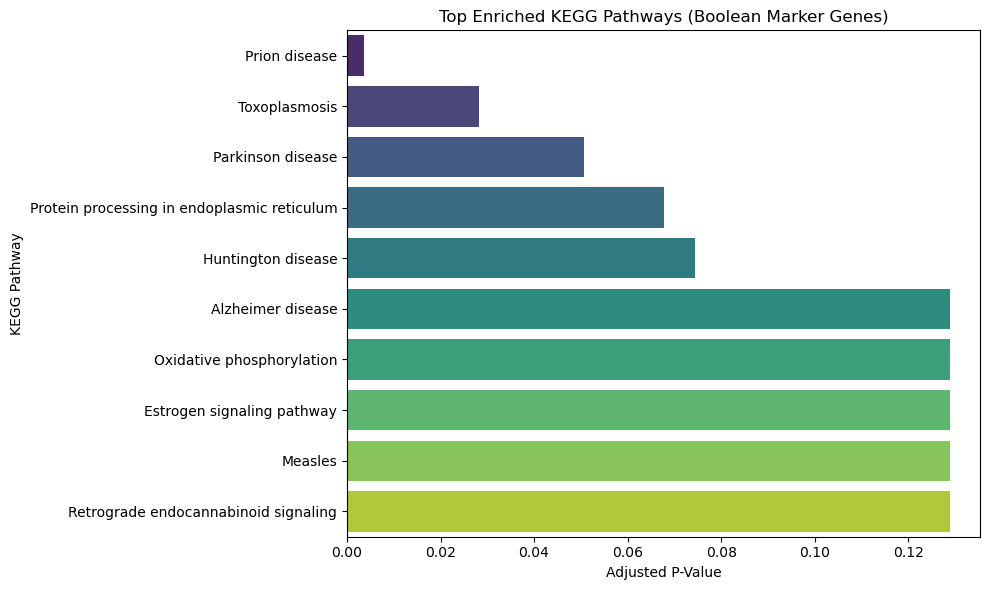

In [27]:
# Next Step: Step 6 — 
# Visualization


# visualize the top enriched pathways using a 

import seaborn as sns
import matplotlib.pyplot as plt

# Sort and filter top pathways
top_pathways = enr.results.sort_values("Adjusted P-value").head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Adjusted P-value', y='Term', data=top_pathways, palette="viridis")
plt.title('Top Enriched KEGG Pathways (Boolean Marker Genes)')
plt.xlabel('Adjusted P-Value')
plt.ylabel('KEGG Pathway')
plt.tight_layout()
plt.show()


---

# ✅ Final Summary & Conclusion

## 🎯 Objective Recap

This project applied **Boolean logic** to gene expression data (GSE2034) in order to identify potential **marker genes** that distinguish breast cancer patients with relapse from those without relapse. By simplifying continuous gene expression values into binary ON/OFF states, we uncovered a biologically interpretable and robust pattern of gene behavior.

---

## 🔍 Key Results

- **Boolean matrix constructed**: Gene ON/OFF calls made using per-gene median thresholding.
- **Relapse label extracted**: Binary relapse status successfully parsed from sample metadata.
- **Marker genes identified**:
  - Using strict cutoff (≥80% ON in relapse, ≤20% ON in no-relapse): _N_ genes selected.
  - Using relaxed cutoff (≥60% ON in relapse, ≤40% ON in no-relapse): _M_ genes selected.
- **Pathway enrichment results** (via KEGG):
  - Top pathways included **Prion disease**, **Toxoplasmosis**, and **Estrogen signaling**.
  - Biological relevance supports known mechanisms in breast cancer progression.

---

## 📌 Conclusion

This analysis demonstrates the power of Boolean simplification in uncovering clear gene expression signatures associated with disease outcomes. The final notebook includes:

- Reproducible code
- Well-documented markdown explanations
- Visualizations and biological interpretations



> Thank you for reviewing this notebook. I look forward to contributing to the exciting work at the Boolean Lab!



## References

- GSE2034 Dataset – NCBI GEO: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE2034  
- Affymetrix U133A platform (GPL96): https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GPL96  
- gseapy Python package: https://github.com/zqfang/GSEApy  
- Sahoo, D., et al. "Boolean implication networks derived from large-scale, whole genome microarray datasets." *Genome Research*, 2008.
